# importing the required packages

In [78]:
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure
import plotly.plotly as py



# read the file

In [79]:
hr_data = pd.read_excel('data/HR-Employee-Attrition.xlsx')

In [80]:
hr_data = hr_data.dropna()
print(hr_data.shape)
print(hr_data.columns)


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# predict the Attrition -  y/n 

In [81]:
# data exploration

In [82]:
hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [83]:
hr_data['Attrition'] = hr_data['Attrition'].astype('category')

In [84]:
hr_data['y'] = hr_data.Attrition.cat.codes

In [85]:
hr_data['y'].value_counts()

0    1233
1     237
Name: y, dtype: int64

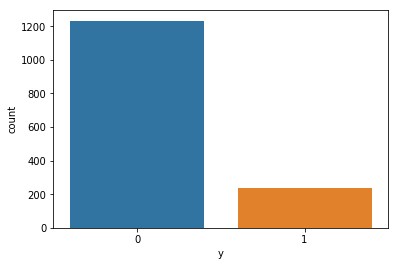

In [86]:
sns.countplot(x='y',data=hr_data);
plt.show()

In [87]:
hr_data.groupby('y').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
y,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [88]:
hr_data = hr_data.drop('Attrition',axis=1)

In [89]:
hr_data.shape

(1470, 35)

###  the average age of customers who changed jobs are less than those who didn't

In [90]:
np.arange(hr_data.shape[0])

array([   0,    1,    2, ..., 1467, 1468, 1469])

In [91]:
hr_data.iloc[1,1]

'Travel_Frequently'

In [92]:
pandas.set_option('display.max_columns',None) # set the option to display all the columns of a dataframe....

In [93]:
hr_data.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [94]:
# remove the columns (Employee Count ,Over18,StandardHours)

In [95]:
cols_to_remove = ['EmployeeCount','Over18','StandardHours']

In [96]:
hr_data = hr_data.drop(hr_data[cols_to_remove],axis=1)

In [97]:
len(hr_data.columns)

32

In [98]:
hr_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'y'],
      dtype='object')

In [99]:
hr_data.groupby('BusinessTravel').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.620000,816.960000,9.760000,2.926667,1064.626667,2.733333,64.866667,2.633333,2.040000,2.793333,6261.946667,14635.600000,2.713333,15.606667,3.173333,2.780000,0.866667,10.593333,2.720000,2.773333,7.146667,4.353333,2.386667,4.300000,0.080000
Travel_Frequently,36.454874,792.628159,9.277978,2.895307,1014.898917,2.693141,65.097473,2.736462,2.014440,2.790614,6193.725632,14318.187726,2.487365,15.158845,3.166065,2.776173,0.765343,11.083032,2.815884,2.776173,7.173285,4.241877,2.342960,4.216606,0.249097
Travel_Rarely,37.092042,803.022052,9.088207,2.915628,1021.793864,2.727709,66.249281,2.742090,2.080537,2.702780,6619.707574,14265.372963,2.744966,15.165868,3.147651,2.685523,0.790988,11.430489,2.806328,2.755513,6.944391,4.208054,2.117929,4.072867,0.149569


In [100]:
hr_data.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
Department,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1205.269841,2.682540,64.301587,2.746032,2.031746,2.603175,6654.507937,13492.984127,2.936508,14.761905,3.142857,2.888889,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667,0.190476
Research & Development,37.042664,806.851197,9.144641,2.899063,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287,0.138398
Sales,36.542601,800.275785,9.365471,2.934978,1038.946188,2.679372,65.520179,2.701794,2.255605,2.751121,6959.172646,14489.793722,2.571749,15.096413,3.136771,2.695067,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300,0.206278


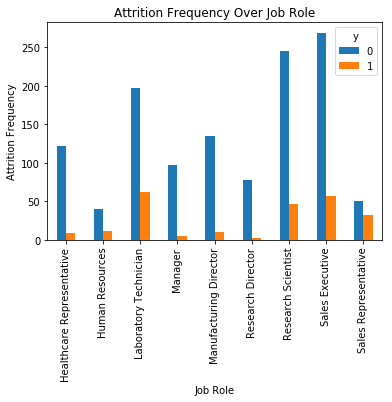

In [101]:
pd.crosstab(hr_data.JobRole,hr_data.y).plot(kind='bar');
plt.title("Attrition Frequency Over Job Role");
plt.xlabel("Job Role");
plt.ylabel("Attrition Frequency");

### plotting for continuous variables

In [102]:
hr_data.select_dtypes(include=['int64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### using seaborn to visualize

In [103]:
### want to see if the monthly income changes over various factors 

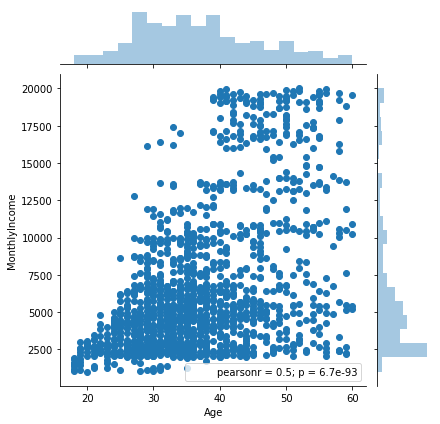

In [104]:
sns.jointplot(hr_data['Age'],hr_data['MonthlyIncome'],kind='scatter');
plt.show()

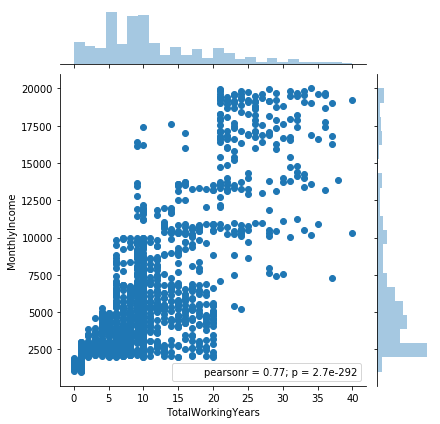

In [106]:
sns.jointplot(hr_data['TotalWorkingYears'],hr_data['MonthlyIncome'],kind='scatter');

In [127]:
col_interest = ['y','Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked']

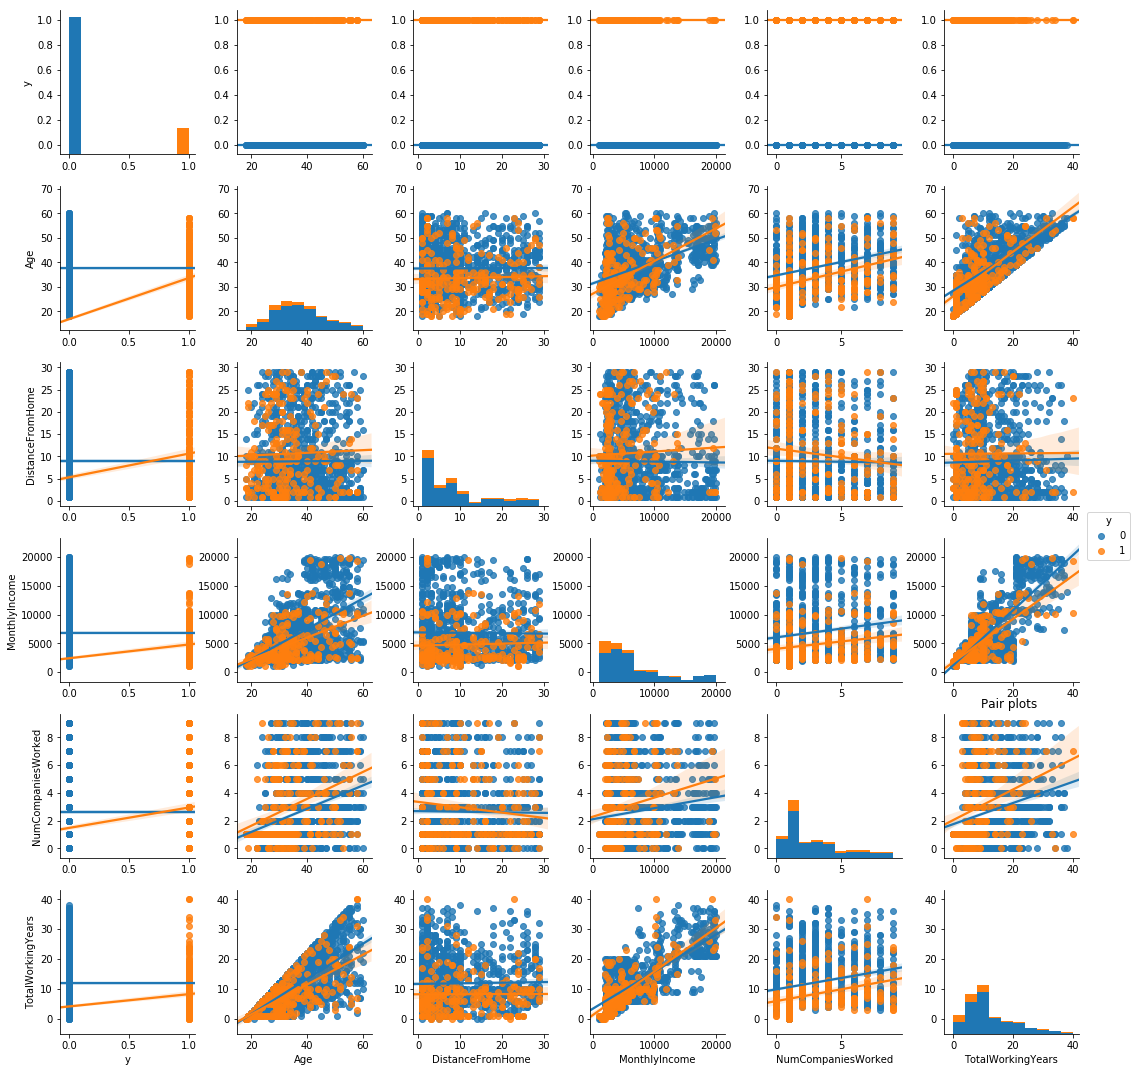

In [131]:
# Generate and plot
sns.pairplot(hr_data[col_interest],kind='reg',hue='y')
plt.title('Pair plots ');
plt.show();

In [130]:
col_int2 = ['y','PerformanceRating','PercentSalaryHike','TotalWorkingYears']

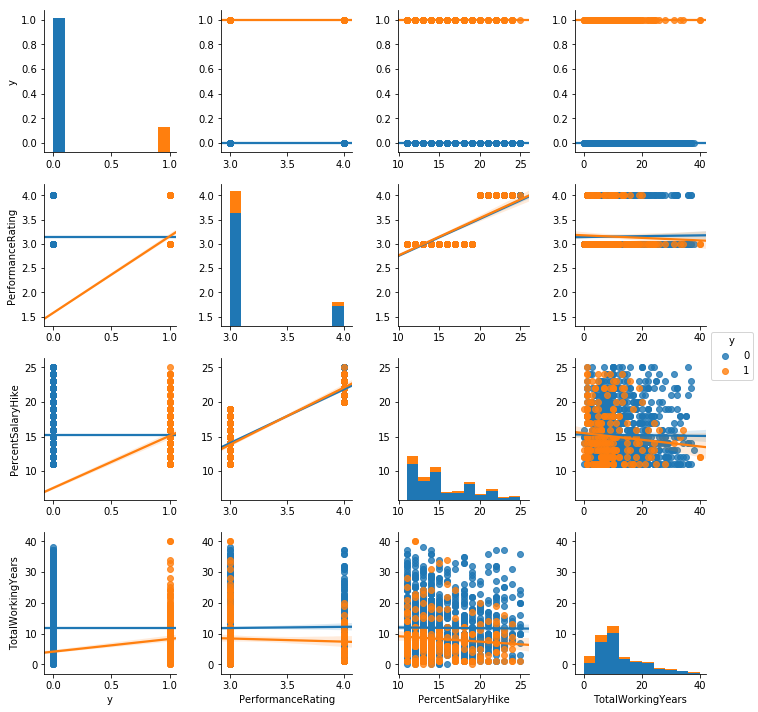

In [133]:
sns.pairplot(hr_data[col_int2],hue="y",kind='reg');
plt.show()

In [338]:
# applying the descritpion to cat columns - Education, EnvironmentSatisfaction,JobInvolvement , 
#JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalancei

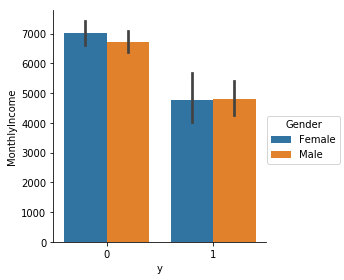

In [136]:
sns.factorplot(data=hr_data,x='y',y='MonthlyIncome',hue='Gender',kind='bar');
plt.show()

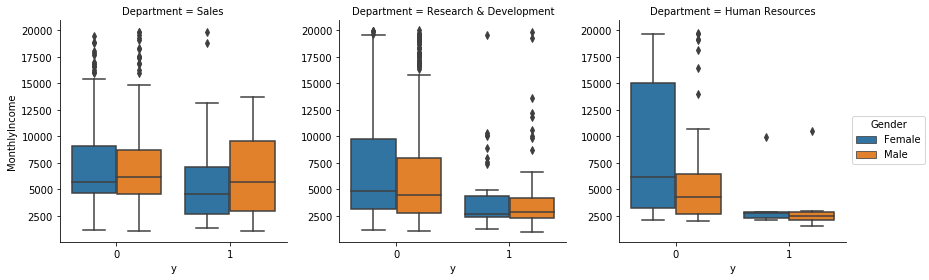

In [139]:
sns.factorplot(data=hr_data,x='y',y='MonthlyIncome',hue='Gender',col='Department',kind='box');
plt.show()

### female attrition is more in Human REsource department.....


In [143]:
col_obj = hr_data.select_dtypes(include=['object']).columns

In [147]:
col_obj

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

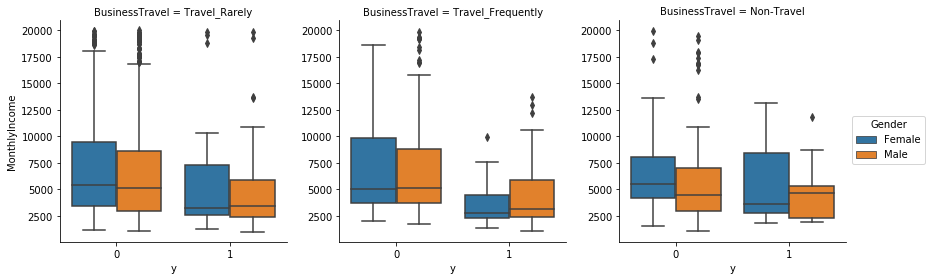

In [150]:
sns.factorplot(data=hr_data , x= 'y', y= 'MonthlyIncome' ,hue= 'Gender',col= 'BusinessTravel', kind='box');
plt.show()

In [151]:
### attrition seems to be more among female when there are no travel...

In [152]:
hr_desc = hr_data.copy()

In [153]:
hr_desc.shape

(1470, 32)

In [154]:
print(hr_desc.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'y'],
      dtype='object')


In [155]:
Education_desc = {1 : 'Below College', 2 : 'College' , 3 : 'Bachelor' , 4 : 'Master' , 5 : 'Doctor'}

In [156]:
hr_desc['Education'].replace(Education_desc,inplace=True)

In [157]:
hr_desc.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [158]:
#hr_desc.Education[hr_desc['Education']=='Below college'] = 'Below College'

In [159]:
EnvironmentSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'}
JobInvolvement_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
JobSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
PerformanceRating_desc = {1 :'Low' , 2 : 'Good' , 3 : 'Excellent' , 4 : 'Outstanding'}
RelationshipSatisfaction_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
WorkLifeBalance_desc = {1 : 'Bad' , 2 : 'Good' , 3 : 'Better' ,4 : 'Best'}


In [160]:
hr_desc['EnvironmentSatisfaction'] = hr_desc['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_desc)
hr_desc['JobInvolvement'] = hr_desc['JobInvolvement'].map(JobInvolvement_desc)
hr_desc['JobSatisfaction'] = hr_desc['JobSatisfaction'].map(JobSatisfaction_desc)
hr_desc['PerformanceRating'] = hr_desc['PerformanceRating'].map(PerformanceRating_desc)
hr_desc['RelationshipSatisfaction'] = hr_desc['RelationshipSatisfaction'].map(RelationshipSatisfaction_desc)
hr_desc['WorkLifeBalance'] = hr_desc['WorkLifeBalance'].map(WorkLifeBalance_desc)

In [161]:
hr_desc.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2,0


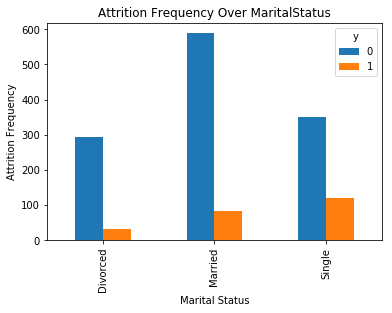

In [162]:
pd.crosstab(hr_desc.MaritalStatus,hr_desc.y).plot(kind='bar');
plt.title("Attrition Frequency Over MaritalStatus");
plt.xlabel('Marital Status');
plt.ylabel('Attrition Frequency');

### single people tend to change jobs frequently

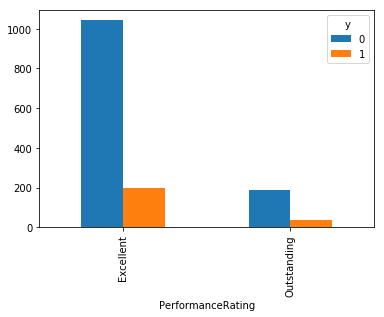

In [163]:
pd.crosstab(hr_desc.PerformanceRating, hr_desc.y).plot(kind='bar');

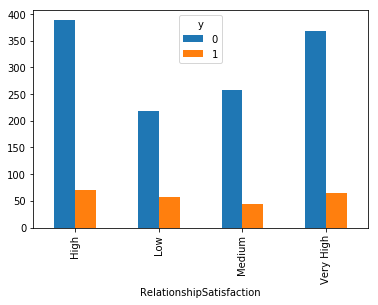

In [164]:
pd.crosstab(hr_desc.RelationshipSatisfaction , hr_desc.y).plot(kind='bar');

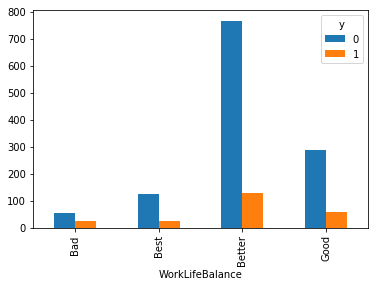

In [165]:
pd.crosstab(hr_desc.WorkLifeBalance, hr_desc.y).plot(kind='bar');

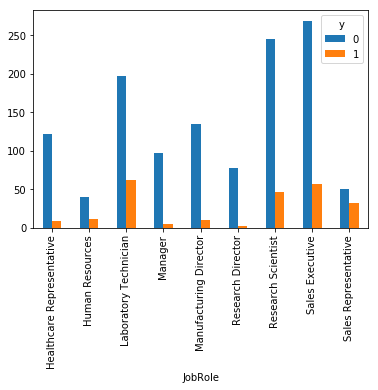

In [167]:
pd.crosstab(hr_desc.JobRole, hr_desc.y).plot(kind='bar');

In [168]:
hr_desc.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [170]:
### dropping columns
##hr_desc = hr_desc.drop(['Over18'],axis=1)
#hr_desc = hr_desc.drop('Attrition',axis=1)

In [171]:
# creating a list of categorical variables
cat_var = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','Gender','JobRole','JobSatisfaction',
'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

In [ ]:
##############-------------------------------------------------------------------------------------

In [356]:
# converted the cat columns from object dtype to category dtype
for var in cat_var:
    hr_desc[var] = hr_desc[var].astype('category')

In [357]:
# creating dummies for cat columns   
for var in cat_var:
    cat_list = 'var' + '_' +var
    cat_list = pd.get_dummies(hr_desc[var],prefix=var)
    hr1 =hr_desc.join(cat_list)
    hr_desc = hr1

In [358]:
hr_desc.info() # 89 columns wooooh....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 89 columns):
Age                                   1470 non-null int64
BusinessTravel                        1470 non-null category
DailyRate                             1470 non-null int64
Department                            1470 non-null category
DistanceFromHome                      1470 non-null int64
Education                             1470 non-null category
EducationField                        1470 non-null category
EmployeeCount                         1470 non-null int64
EmployeeNumber                        1470 non-null int64
EnvironmentSatisfaction               1470 non-null category
Gender                                1470 non-null category
HourlyRate                            1470 non-null int64
JobInvolvement                        1470 non-null category
JobLevel                              1470 non-null int64
JobRole                               1470 non-null category

In [359]:
# creating a list of variables
hr_vars=hr_desc.columns.values.tolist()

to_keep=[i for i in hr_vars if i not in cat_var]

In [360]:
len(hr_vars)

89

In [361]:
len(to_keep)

75

In [362]:
hr_final = hr_desc[to_keep]

In [363]:
hr_final.columns # final columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'y',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Bachelor', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_High', 'EnvironmentSatisfaction_Low',
    

In [ ]:
"""data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y] """

In [364]:
hr_final_vars = hr_final.columns.values.tolist() # creating a list of final variables

In [365]:
y = ['y']

In [366]:
X = [i for i in hr_final_vars if i not in y] # excluding the target variable

In [367]:
X

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'Education_Bachelor',
 'Education_Below College',
 'Education_College',
 'Education_Doctor',
 'Education_Master',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction_High',
 'EnvironmentSatisfaction_Low',
 'EnvironmentSatisfaction_Medium',
 'EnvironmentSatisfaction_Very High',
 'J

# Feature Selection
### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and 
### choose either the best or worst performing feature, setting the feature aside and then repeating 
### the process with the rest of the features. This process is applied until all features in the dataset are exhausted. 
### The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [368]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [369]:
logreg = LogisticRegression()

In [370]:
rfe = RFE(logreg)

In [371]:
rfe = rfe.fit(hr_final[X] , hr_final[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Suhasini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[False False False False False False False False False False False False
  True False  True False False False False  True  True False False  True
 False  True False False  True False  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True False False  True False  True False  True  True
  True  True  True  True False False False  True False False  True False
  True False]
[24 34 19 35 36 33 14 37 38 11 28 30  1 13  1 15  6  4  3  1  1 20 31  1  2
  1 29 23  1 21  1  1 12  1  1  1  1  1  1  1  1  1 22  1  1  5  1  1  1  1
  1  1 10 32  1 27  1 25  1  1  1  1  1  1 16 26  9  1  8  7  1 18  1 17]


In [372]:
print(rfe.estimator_)
print(rfe.n_features_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
37


In [373]:
rfe.get_params(deep=True)

{'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'ovr',
 'estimator__n_jobs': 1,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

In [374]:
### find the columns which has high ranking.... 
cols = hr_final.loc[:,rfe.support_].columns.tolist()

In [376]:
#cols.remove('y')

In [377]:
X = hr_final[cols]
y = hr_final['y']

In [378]:
### implementing the stats model


In [379]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result =logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.333015
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1435
Method:                           MLE   Df Model:                           34
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                  0.2461
Time:                        13:52:30   Log-Likelihood:                -489.53
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 3.961e-48
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
StockOptionLevel                      -0.1625      0.144   

C:\Users\Suhasini\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# predicting on the test set

In [382]:
y_pred = logreg.predict(X_test)
print('accuracy of logistic reg classifier on test set : {:.2f}'.format(logreg.score(X_test,y_test)))

accuracy of logistic reg classifier on test set : 0.87


# cross validation

In [395]:
len(y_test)

441

In [383]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [384]:
kFold = model_selection.KFold(n_splits=10,random_state=10)

In [385]:
modelcv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelcv, X_train, y_train , cv =kFold, scoring=scoring)
print("10 fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10 fold cross validation average accuracy: 0.854
[ 0.86407767  0.85436893  0.87378641  0.87378641  0.81553398  0.86407767
  0.88349515  0.81553398  0.78640777  0.91176471]


In [386]:
# The average accuracy remains close to Logistic Reg Model accuracy...so we can conclude that model generalizes well...

In [387]:
# confusion matrix

In [388]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[363   8]
 [ 50  20]]


In [392]:
print("Accuracy of Confusion MAtrix:" , 383/(383+58))

Accuracy of Confusion MAtrix: 0.8684807256235828


In [389]:
# correct prediction = 363+20 = 383 , incorrect predictions = 50+8 = 58

In [390]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       371
          1       0.71      0.29      0.41        70

avg / total       0.85      0.87      0.84       441



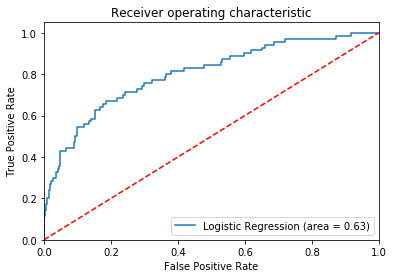

In [391]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()